In [13]:
!pip install -Uq fastbook python-dotenv ipywidgets voila
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter serverextension enable --sys-prefix voila

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.2.11 OK


In [14]:
from fastbook import *
from fastai.vision.widgets import *
from ipywidgets import *

from dotenv import load_dotenv

In [5]:
load_dotenv() # loading

KEY = os.environ.get('AZURE_KEY')
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

## Attempt to create a blue eye and brown eye classifier

In [12]:
animal_types = ['llama', 'alpaca']
path = Path('animals')

if not path.exists():
    path.mkdir()
    for img in animal_types:
        dest = path / img
        dest.mkdir(exist_ok=True)
        results = search_images_bing(KEY, f'{img} animals')
        download_images(dest, urls=results.attrgot('contentUrl'))

HTTPError: 401 Client Error: PermissionDenied for url: https://api.bing.microsoft.com/v7.0/images/search?q=llama+animals&count=150&min_height=128&min_width=128

In [7]:
fns = get_image_files(path)
fns

(#0) []

In [8]:
failed = verify_images(fns)
failed

(#0) []

In [9]:
failed.map(Path.unlink)

(#0) []

In [10]:
animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [11]:
dls = animals.dataloaders(path)

TypeError: 'NoneType' object is not iterable

In [37]:
dls.valid.show_batch(max_n=12, nrows=4)

NameError: name 'dls' is not defined

In [38]:
eyes = eyes.new(
    item_tfms=RandomResizedCrop(128),
    batch_tfms=aug_transforms(mult=2))
dls = eyes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2,
                    unique=True)

TypeError: 'NoneType' object is not iterable

In [30]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.194328,0.852807,0.396226,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.095218,0.648618,0.377358,00:05
1,1.047963,0.639504,0.377358,00:05
2,1.030420,0.614366,0.339623,00:05
3,0.942683,0.590862,0.320755,00:05


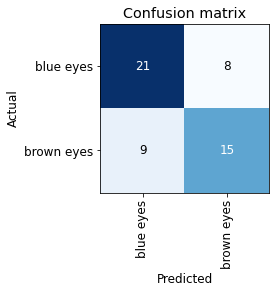

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

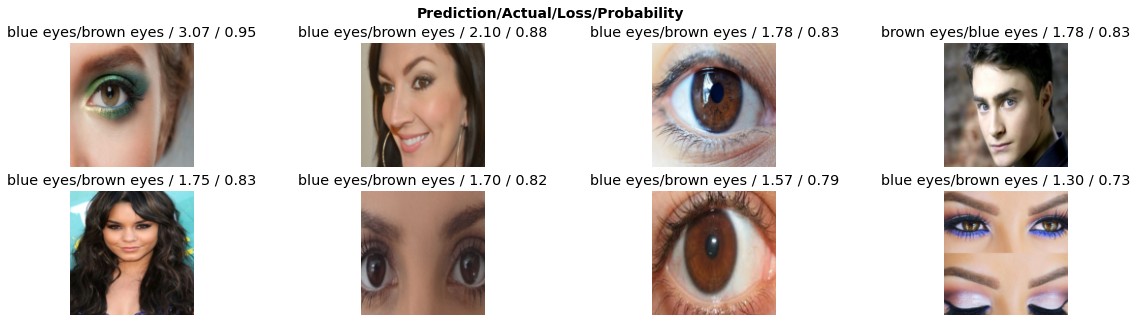

In [32]:
interp.plot_top_losses(8, nrows=2, figsize=(20,5))

In [33]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [40]:
for i in cleaner.delete():
    cleaner.fns[i].unlink()
    
for i, cat in cleaner.change():
    shutil.move(str(cleaner.fns[i]), path / cat)

In [41]:
learn.export()

In [42]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [43]:
learn_inf = load_learner(path / 'export.pkl')

In [44]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()
btn_run = widgets.Button(description='Classify')

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl:
        display(img.to_thumb(128,128))
        pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [45]:
VBox([widgets.Label('Select your eyes!'),
     btn_upload, btn_run, out_pl, lbl_pred])

IndexError: list index out of range

IndexError: list index out of range